## Geographic EDA

### Overview of Geographic spread

In [210]:
# Load libraries and read the data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [211]:
# Read the data
map_data_path = 'data/cleaned/df_imdb_map.csv'
mbti_data_path = 'data/cleaned/df_mbti.csv'

fig_save_path = "output/Geographic_Img"

In [212]:
# Loading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(set(world['continent']))
# Only keep the continents
world = world[world['continent'].isin(['Asia', 'Oceania', 'Seven seas (open ocean)', 'Europe', 'South America', 'North America', 'Africa'])]

df_imdb_map = pd.read_csv(map_data_path)

df_mbti = pd.read_csv(mbti_data_path)

{'Seven seas (open ocean)', 'Africa', 'Asia', 'South America', 'North America', 'Antarctica', 'Oceania', 'Europe'}


/var/folders/m4/lr92jqdj1_z4cm26h66ndqy40000gn/T/ipykernel_75313/3920587709.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [213]:
print(world.head())

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


In [214]:
average_scores_revenues = df_imdb_map.groupby('country').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()
average_scores_revenues.head()

,country,score,revenue
0,AR,66.073171,4.565608e+08
1,AT,67.000000,7.228277e+07
2,AU,66.706039,1.929454e+08
3,BE,55.571429,3.283100e+08
4,BO,52.000000,6.383325e+08


### Overview by country

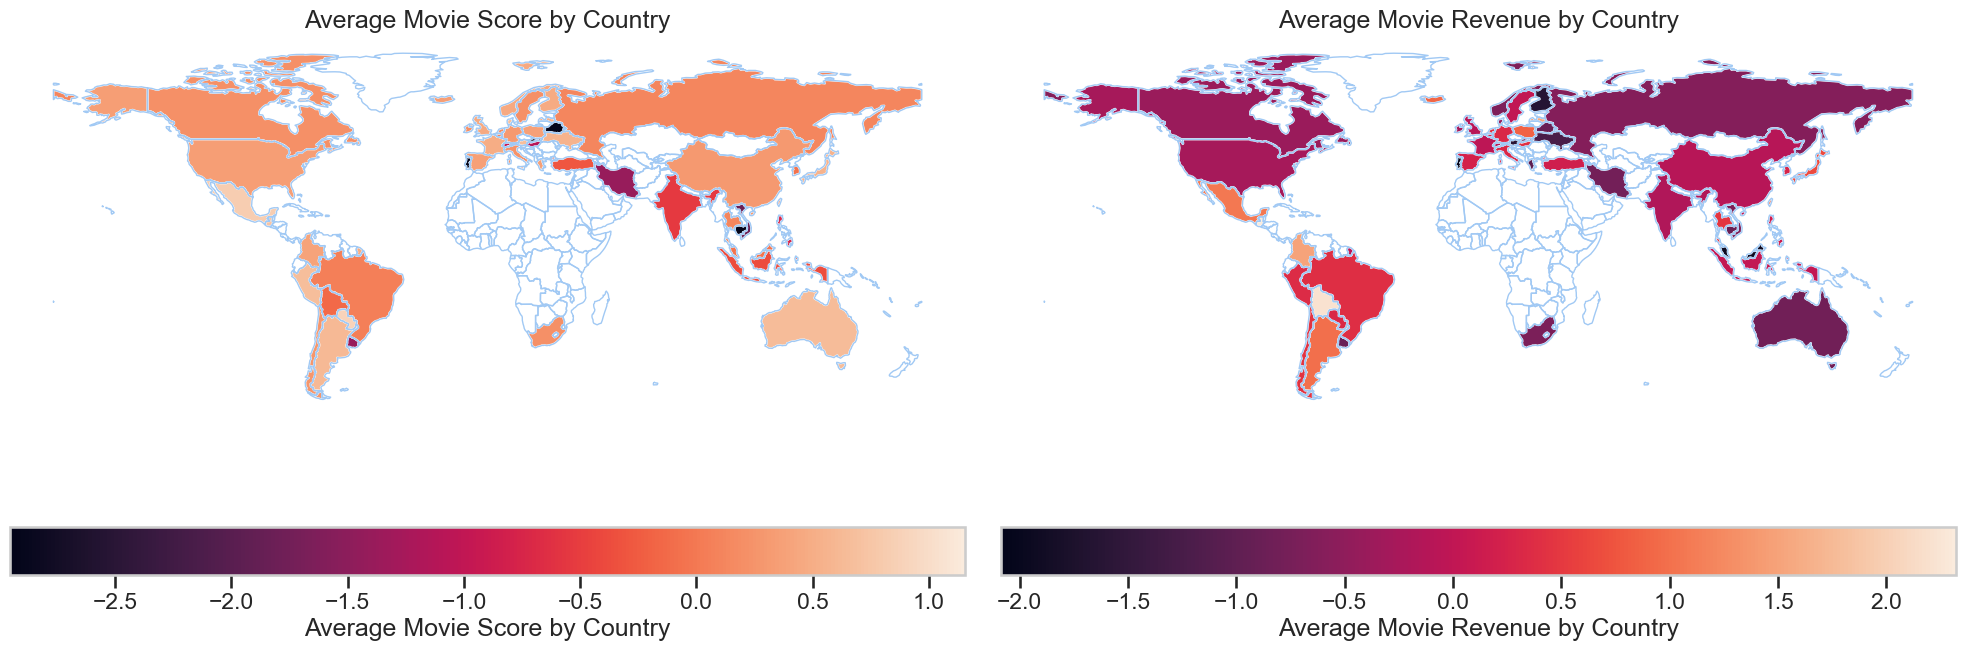

In [215]:
# Creating a mapping of country codes in the movie dataset to country names in the world map dataset
# This requires some knowledge of country codes and names
country_mapping = {
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BE': 'Belgium',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BY': 'Belarus',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CN': 'China',
    'CO': 'Colombia',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HK': 'Hong Kong',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IR': 'Iran',
    'IS': 'Iceland',
    'IT': 'Italy',
    'JP': 'Japan',
    'KH': 'Cambodia',
    'KR': 'South Korea',
    'LV': 'Latvia',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PL': 'Poland',
    'PR': 'Puerto Rico',
    'PT': 'Portugal',
    'PY': 'Paraguay',
    'RU': 'Russia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SK': 'Slovakia',
    'SU': 'Soviet Union',
    'TH': 'Thailand',
    'TR': 'Turkey',
    'TW': 'Taiwan',
    'UA': 'Ukraine',
    'US': 'United States of America',
    'UY': 'Uruguay',
    'VN': 'Vietnam',
    'XC': 'Czechoslovakia',
    'ZA': 'South Africa'
}

# Mapping the country codes to country names in the movie dataset
df_imdb_map['country'] = df_imdb_map['country'].map(country_mapping).fillna(df_imdb_map['country'])

# Now let's try merging again and plotting on the map
# Merging our movie data with the world map data again

# Creating a dataframe for average score and revenue by country to merge with the world map
average_scores_revenues = df_imdb_map.groupby('country').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()

# Standardizing the data
from sklearn.preprocessing import StandardScaler
average_scores_revenues['score'] = StandardScaler().fit_transform(average_scores_revenues[['score']])
average_scores_revenues['revenue'] = StandardScaler().fit_transform(average_scores_revenues[['revenue']])

# Merging with the world map data
world_average = world.merge(average_scores_revenues, left_on='name', right_on="country", how='left')

# print(world.head())

# Plotting the data on the world map
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for average movie score by country
world_average.boundary.plot(ax=axes[0], linewidth=1)
world_average.plot(column='score', ax=axes[0], legend=True, legend_kwds={'label': "Average Movie Score by Country", 'orientation': "horizontal"})
axes[0].set_title('Average Movie Score by Country')
axes[0].axis('off')

# Plot for average movie revenue by country
world_average.boundary.plot(ax=axes[1], linewidth=1)


world_average.plot(column='revenue', ax=axes[1], legend=True, legend_kwds={'label': "Average Movie Revenue by Country", 'orientation': "horizontal"})
axes[1].set_title('Average Movie Revenue by Country')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# save the figure
fig.savefig(fig_save_path + "/average_score_revenue_map.png")


### Overview by continents

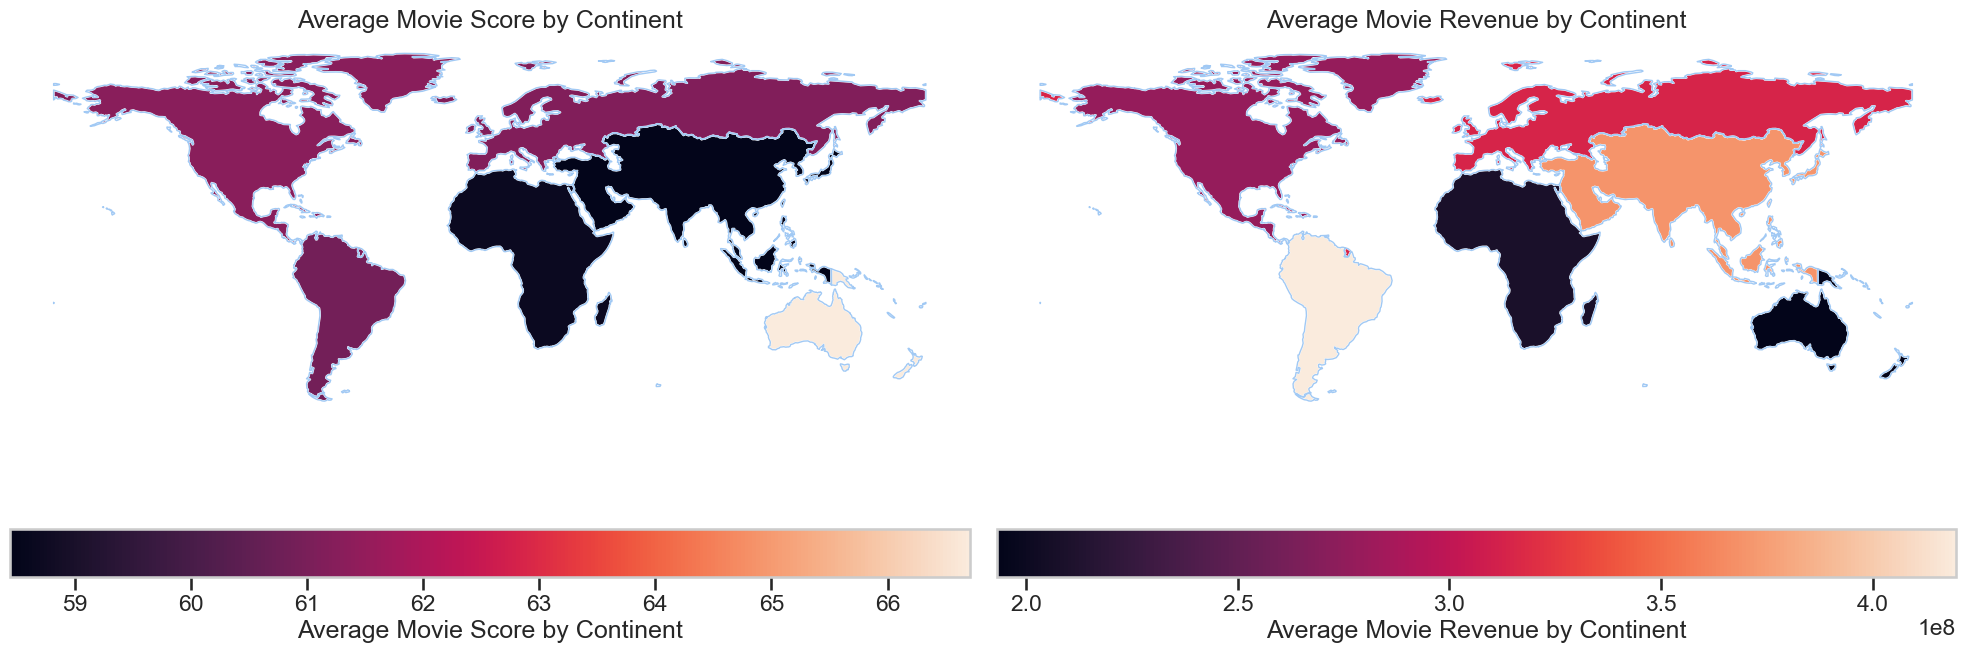

In [216]:
# instead of grouping by country, we can group by continent
# Creating a dataframe for average score and revenue by continent to merge with the world map
# Create a continent column in the movie dataset 
# This requires some knowledge of country codes and names
#Creating a mapping of countries to continents
country_continent_mapping = world[['name', 'continent']].drop_duplicates().set_index('name')['continent'].to_dict()

# Mapping the countries in the movie dataset to continents
df_imdb_map['continent'] = df_imdb_map['country'].map(country_continent_mapping)

# Grouping by continent and calculating average score and revenue
continent_averages = df_imdb_map.groupby('continent').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()

# Merging the aggregated data with the world map data frame for continents
world_continents = world[['continent', 'geometry']].dissolve(by='continent')

# Merging the aggregated data with the world map data for continents
world_continents = world_continents.merge(continent_averages, left_on='continent', right_on='continent', how='left')

# Plotting the data on the world map for continents
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for average movie score by continent
world_continents.boundary.plot(ax=axes[0], linewidth=1)
world_continents.plot(column='score', ax=axes[0], legend=True, legend_kwds={'label': "Average Movie Score by Continent", 'orientation': "horizontal"})
axes[0].set_title('Average Movie Score by Continent')
axes[0].axis('off')

# Plot for average movie revenue by continent
world_continents.boundary.plot(ax=axes[1], linewidth=1)
world_continents.plot(column='revenue', ax=axes[1], legend=True, legend_kwds={'label': "Average Movie Revenue by Continent", 'orientation': "horizontal"})
axes[1].set_title('Average Movie Revenue by Continent')
axes[1].axis('off')

plt.tight_layout()
plt.show()

fig.savefig(fig_save_path + "/average_score_revenue_map_continents.png")




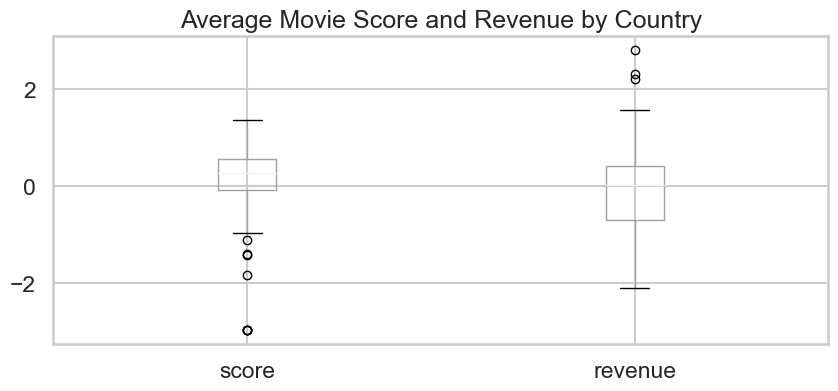

In [217]:


# Boxplot for average movie score and revenue by country
average_scores_revenues.boxplot(column=['score', 'revenue'], figsize=(10, 4))
# sns.boxplot(x="country", y=["score", 'revenue'], data=average_scores_revenues)
plt.title('Average Movie Score and Revenue by Country')
plt.show()

# save the figure
fig.savefig(fig_save_path + "/average_score_revenue_boxplot.png")


In [218]:
# Generating the count for each of the 16 MBTI personalities in each movie
mbti_counts = df_mbti.groupby(['movie_name', 'mbti']).size().unstack(fill_value=0)

mbti_counts_reset = mbti_counts.reset_index()
mbti_counts_reset.columns.name = None

# Displaying the counts
mbti_counts_reset.head()

,movie_name,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,#Alive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,...And Justice For All,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,07/27/1978,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,10 Cloverfield Lane,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
4,10 Things I Hate About You,1,0,0,1,1,0,0,0,0,2,1,0,0,0,0,1


In [219]:
# merge the data to the original movie dataset
df_imdb_mbti = df_imdb_map.merge(mbti_counts_reset, left_on='movie_name', right_on='movie_name', how='left')

In [220]:
df_imdb_mbti.drop('Unnamed: 0', axis=1, inplace=True)

In [221]:
df_imdb_mbti.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,Creed Iii,2023-03-02,73.0,"Drama, Action",75000000.0,2.716167e+08,Australia,2023.0,Oceania,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Avatar: The Way Of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",460000000.0,2.316795e+09,Australia,2022.0,Oceania,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy",100000000.0,7.244590e+08,Australia,2023.0,Oceania,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy",12300000.0,3.420000e+07,Australia,2023.0,Oceania,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Supercell,2023-03-17,61.0,Action,77000000.0,3.409420e+08,United States of America,2023.0,North America,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
# fillna in each columns with the mean of the column values group by country
numeric_columns = df_imdb_mbti.select_dtypes(include=['number']).columns
df_imdb_mbti.dropna(subset=numeric_columns, inplace=True)

In [223]:
df_imdb_mbti.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
11,The Exorcist,2022-11-02,55.0,Horror,12000000.0,4.282145e+08,Mexico,2022.0,North America,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,A Bronx Tale,1994-05-20,78.0,"Drama, Crime",10000000.0,1.728790e+07,Australia,1994.0,Oceania,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
68,Avatar,2009-12-17,76.0,"Action, Adventure, Fantasy, Science Fiction",237000000.0,2.923706e+09,Australia,2009.0,Oceania,1.0,...,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0
75,John Wick,2014-11-26,74.0,"Action, Thriller",30000000.0,7.595880e+07,Australia,2014.0,Oceania,1.0,...,2.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0
95,Scream,2022-01-13,67.0,"Horror, Mystery, Thriller",24000000.0,1.388748e+08,Australia,2022.0,Oceania,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [224]:
print(len(df_imdb_mbti))

2339


In [225]:
df_imdb_mbti.to_csv("data/cleaned/df_map_mbti.csv")

### Investigate the reprensentative countries

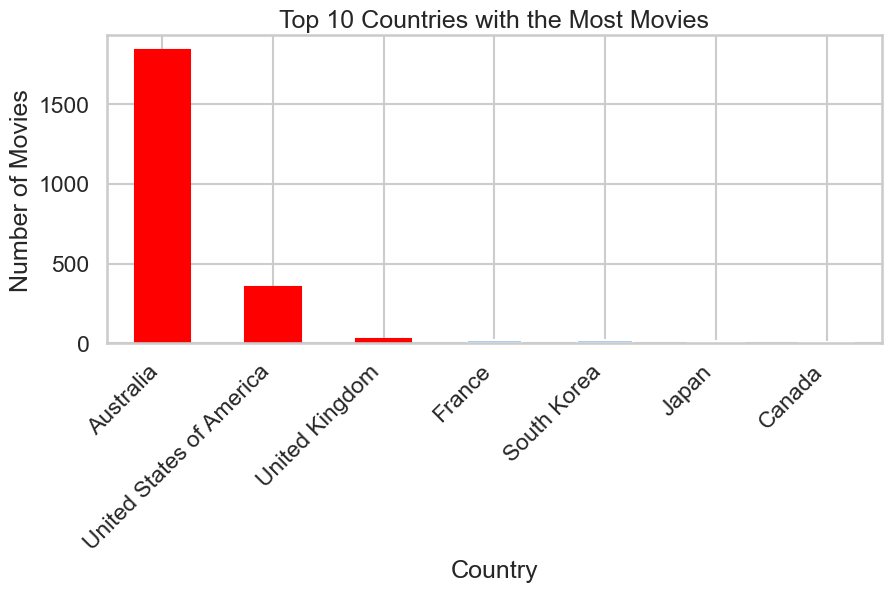

In [226]:
## List the top 10 countries with the most movies
top_count = df_imdb_mbti['country'].value_counts().head(7)

## Plot them and highlight the top 3
plt.figure(figsize=(10, 4))
ax = plt.gca()
top_count.plot.bar(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Top 10 Countries with the Most Movies')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Movies')

# Highlighting the top 3 countries
for i in range(3):
    ax.get_children()[i].set_color('red')

# save the figure
fig.savefig(fig_save_path + "/top_10_countries.png")


In [227]:
## Plot the top 3 count in australia and United States of America
top_3_countries = ['Australia', 'United States of America', 'United Kingdom']
df_imdb_mbti_top3 = df_imdb_mbti[df_imdb_mbti['country'].isin(top_3_countries)]

df_imdb_mbti_top3.columns

Index(['movie_name', 'release_date', 'score', 'genre', 'budget', 'revenue',
       'country', 'release_year', 'continent', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP',
       'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ',
       'ISFP', 'ISTJ', 'ISTP'],
      dtype='object')

In [228]:
personalities_list = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ',
       'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP',
       'ISTJ', 'ISTP']
print(len(personalities_list))

16


### Distributions of MBTI in top3 countries

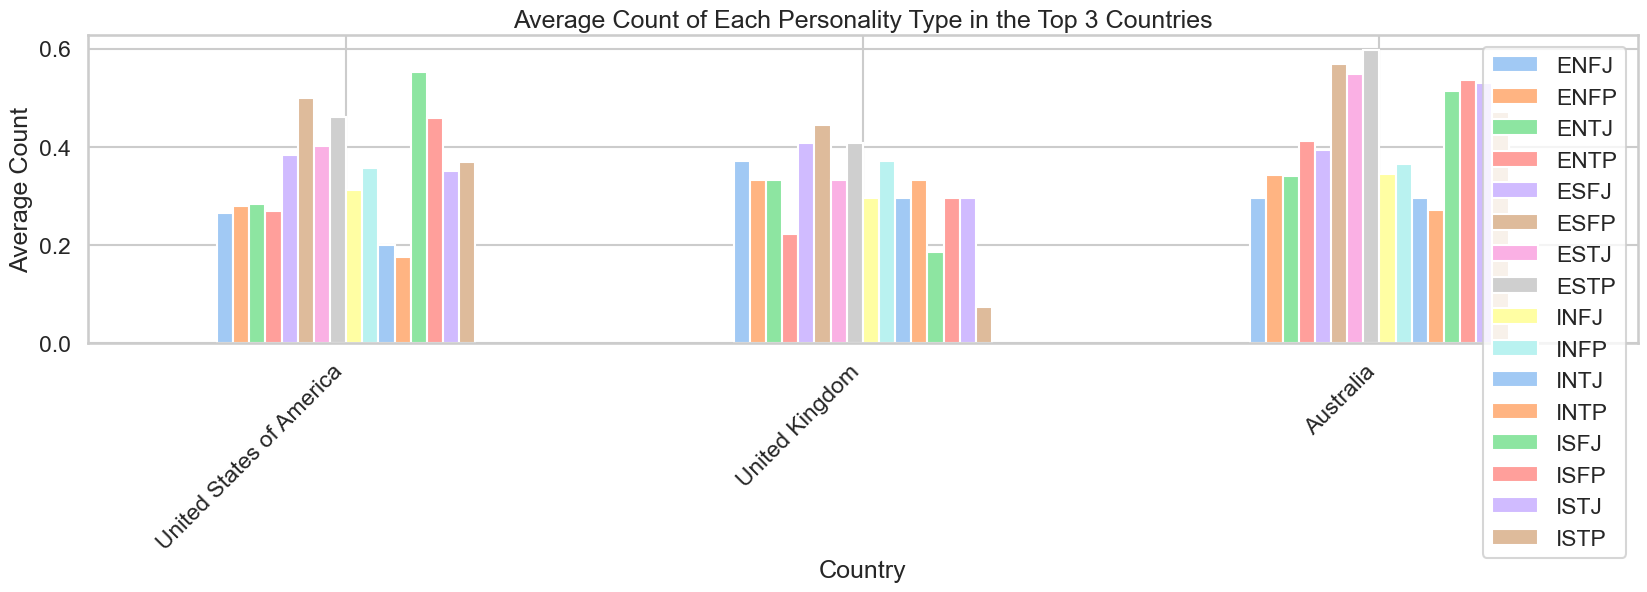

In [229]:
# Plotting the average count of each personality type in the top 3 countries, make it in order
plt.figure(figsize=(20, 4))
ax = plt.gca()
average_count = df_imdb_mbti_top3.groupby('country')[personalities_list].mean().sort_values(by='country', ascending=False).plot.bar(ax=ax)
# Plot the three personality type with highest mean corresponding to each country 


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Average Count of Each Personality Type in the Top 3 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Average Count')
plt.show()


/var/folders/m4/lr92jqdj1_z4cm26h66ndqy40000gn/T/ipykernel_75313/1195545068.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['average_mbti'] = filtered_df[mbti_columns].mean(axis=1)


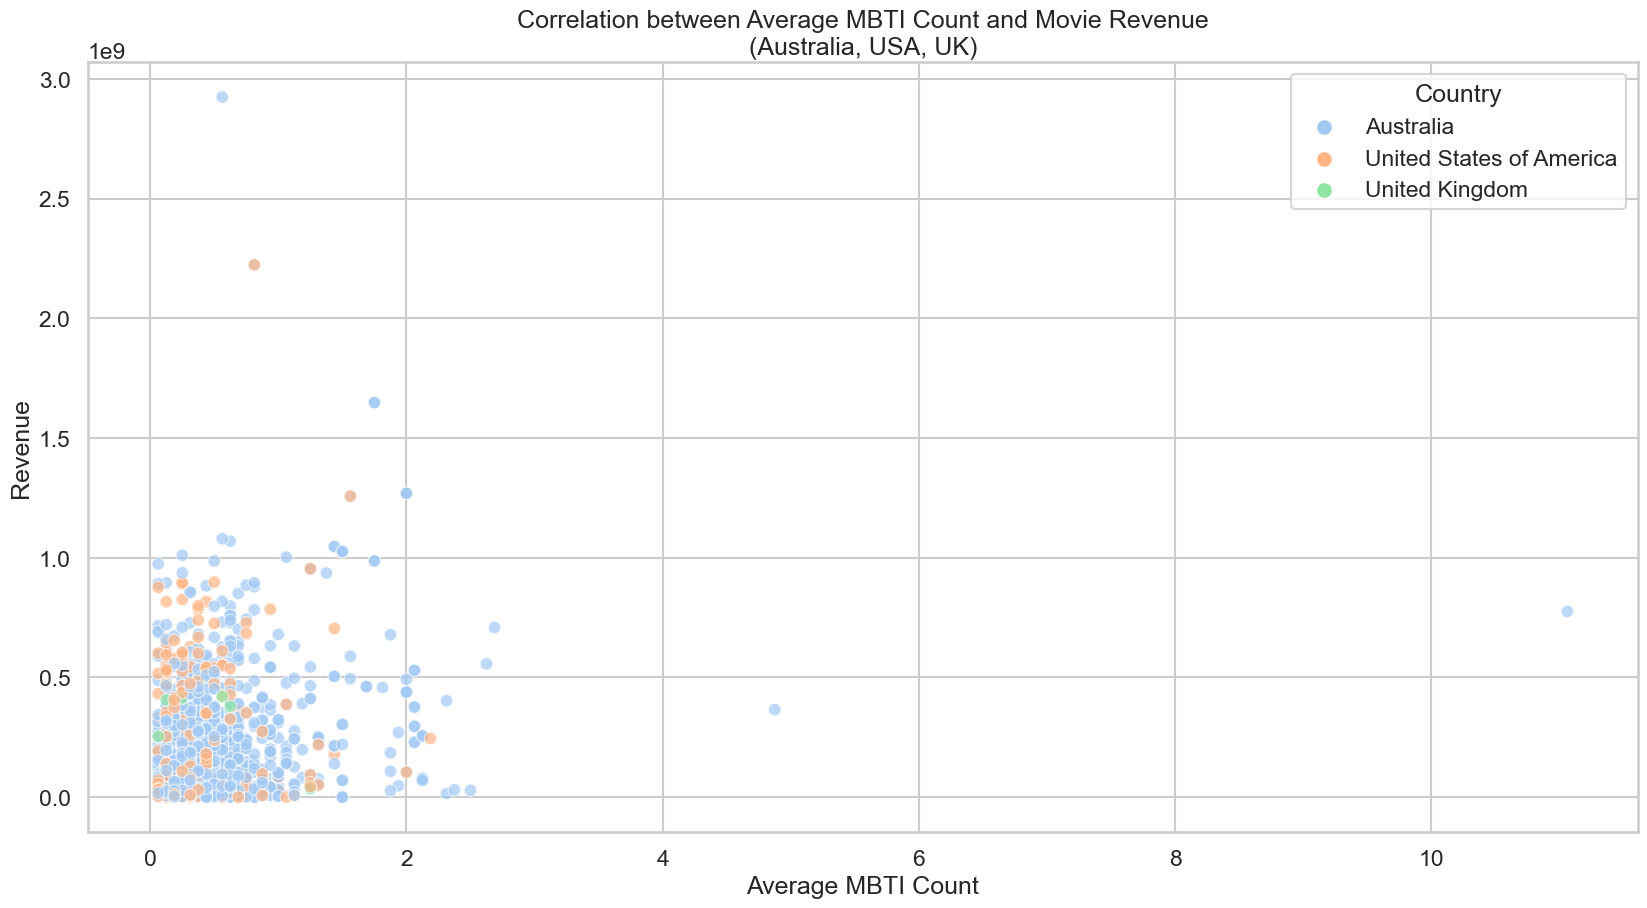

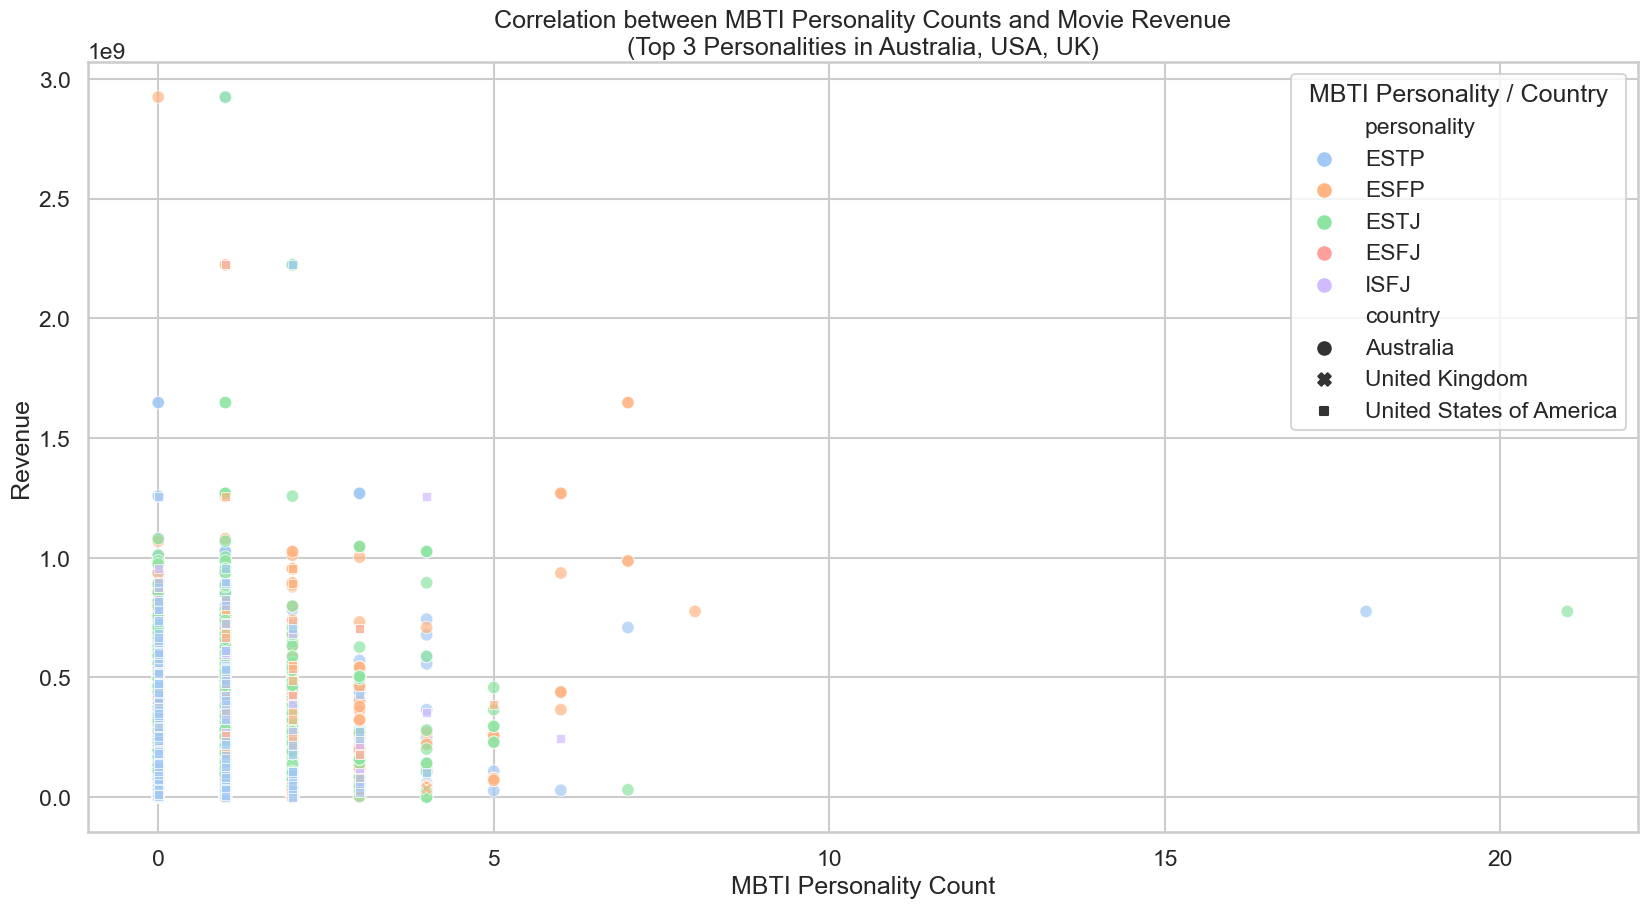

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the dataset for movies released in Australia, USA, and Japan
filtered_df = df_imdb_mbti[df_imdb_mbti['country'].isin(['Australia', 'United States of America', 'United Kingdom'])]

# Extracting MBTI columns
mbti_columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 
                'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

# Calculating the average count for the 16 MBTI personalities for each movie
filtered_df['average_mbti'] = filtered_df[mbti_columns].mean(axis=1)

# Analyzing the correlation between these average counts and the movie revenues
correlation = filtered_df[['average_mbti', 'revenue']].corr()

# Visualizing the findings
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_df, x='average_mbti', y='revenue', hue='country', alpha=0.7)
plt.title('Correlation between Average MBTI Count and Movie Revenue\n(Australia, USA, UK)')
plt.xlabel('Average MBTI Count')
plt.ylabel('Revenue')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# correlation


# Calculating the average count for each MBTI personality in each country
average_mbti_by_country = filtered_df.groupby('country')[mbti_columns].mean()

# Finding the top 3 personalities with the highest average count in each country
top_mbti_countries = average_mbti_by_country.apply(lambda x: x.nlargest(3).index, axis=1)

# Filtering the dataset for these top 3 personalities in each country
filtered_mbti_data = []
for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        temp_df = filtered_df[['country', 'revenue', mbti]]
        temp_df = temp_df[temp_df['country'] == country]
        temp_df.rename(columns={mbti: 'mbti_count'}, inplace=True)
        temp_df['personality'] = mbti
        filtered_mbti_data.append(temp_df)

filtered_mbti_df = pd.concat(filtered_mbti_data)

# Analyzing the correlation between these MBTI counts and the movie revenues
correlation_mbti_revenue = filtered_mbti_df.groupby('personality')[['mbti_count', 'revenue']].corr().iloc[0::2, -1]

# Visualizing the findings
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_mbti_df, x='mbti_count', y='revenue', hue='personality', style='country', alpha=0.7)
plt.title('Correlation between MBTI Personality Counts and Movie Revenue\n(Top 3 Personalities in Australia, USA, UK)')
plt.xlabel('MBTI Personality Count')
plt.ylabel('Revenue')
plt.legend(title='MBTI Personality / Country')
plt.grid(True)
plt.show()

# correlation_mbti_revenue, top_mbti_countries


### Correlation of MBTI and Revenue

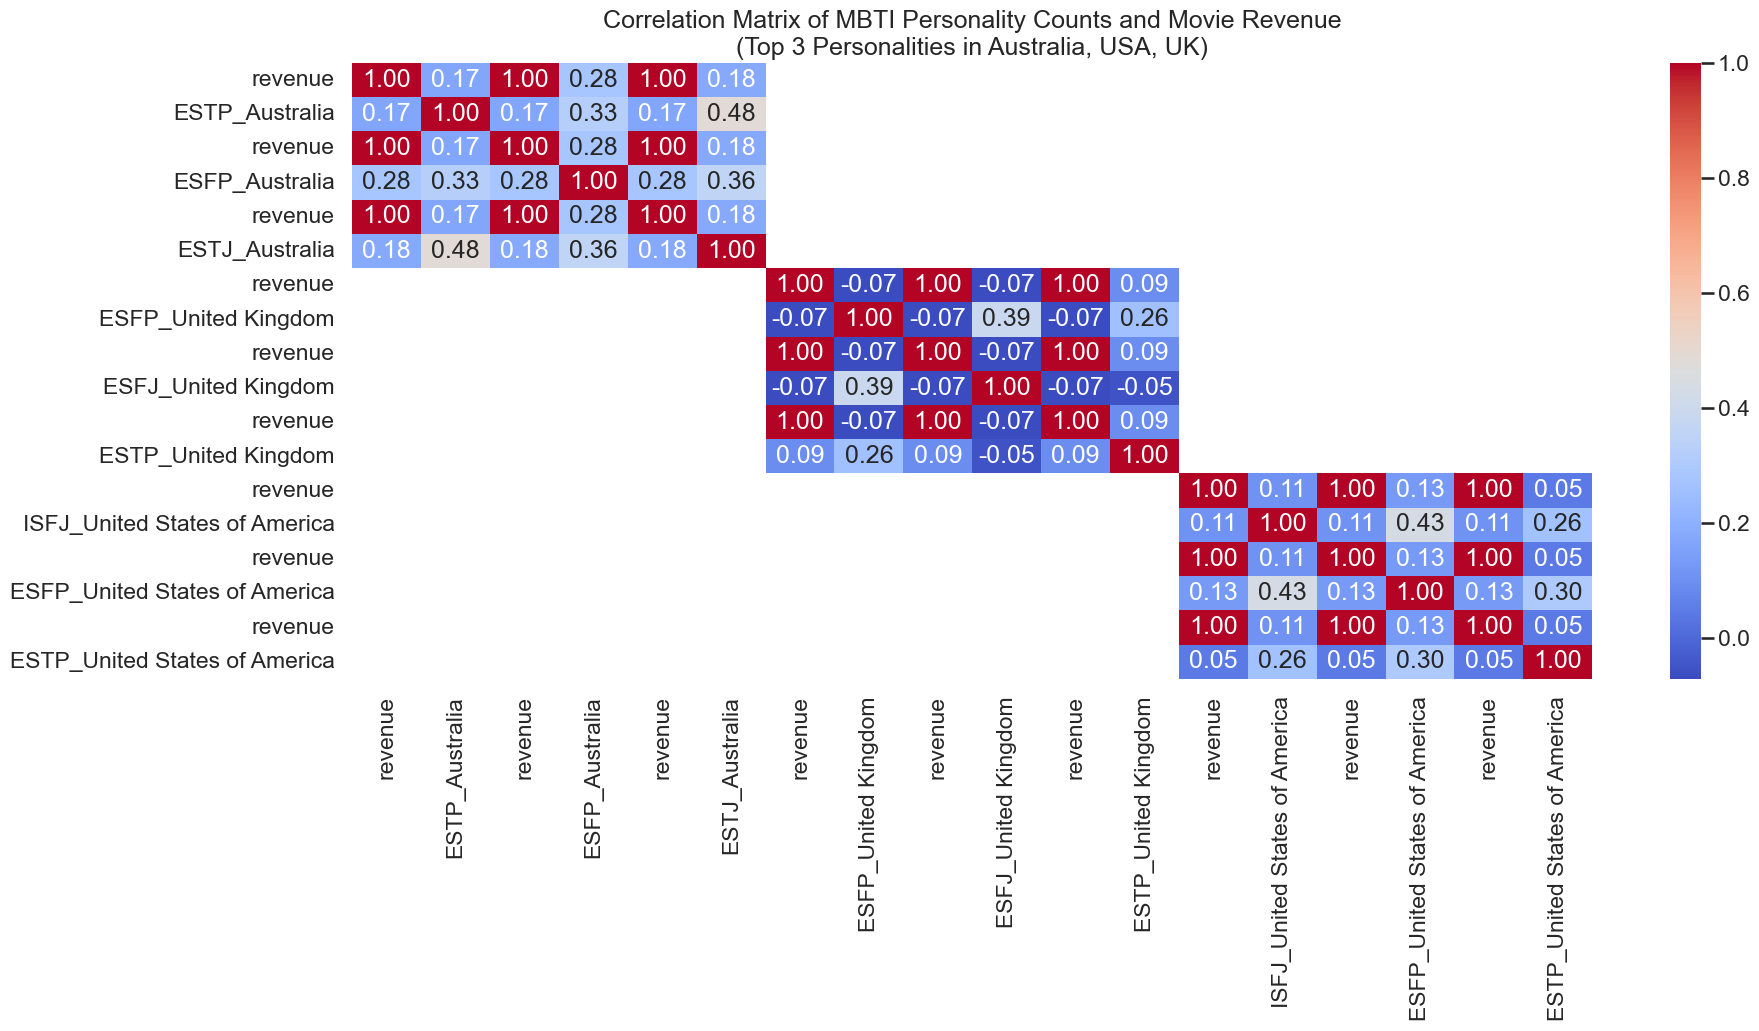

In [231]:
# Creating a new DataFrame for correlation analysis
correlation_data = []

for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        country_data = filtered_df[filtered_df['country'] == country]
        correlation_data.append(country_data[['revenue', mbti]].rename(columns={mbti: f"{mbti}_{country}"}))

# Concatenating the data for correlation analysis
correlation_df = pd.concat(correlation_data, axis=1)

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(20, 8))
sns.set_style('white')
corr_matrix = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MBTI Personality Counts and Movie Revenue\n(Top 3 Personalities in Australia, USA, UK)')
plt.savefig('output/Geographic_Img/core_top3_reve.png')  # Save the graph as an image file
plt.show()



Correlation of MBTI and scores

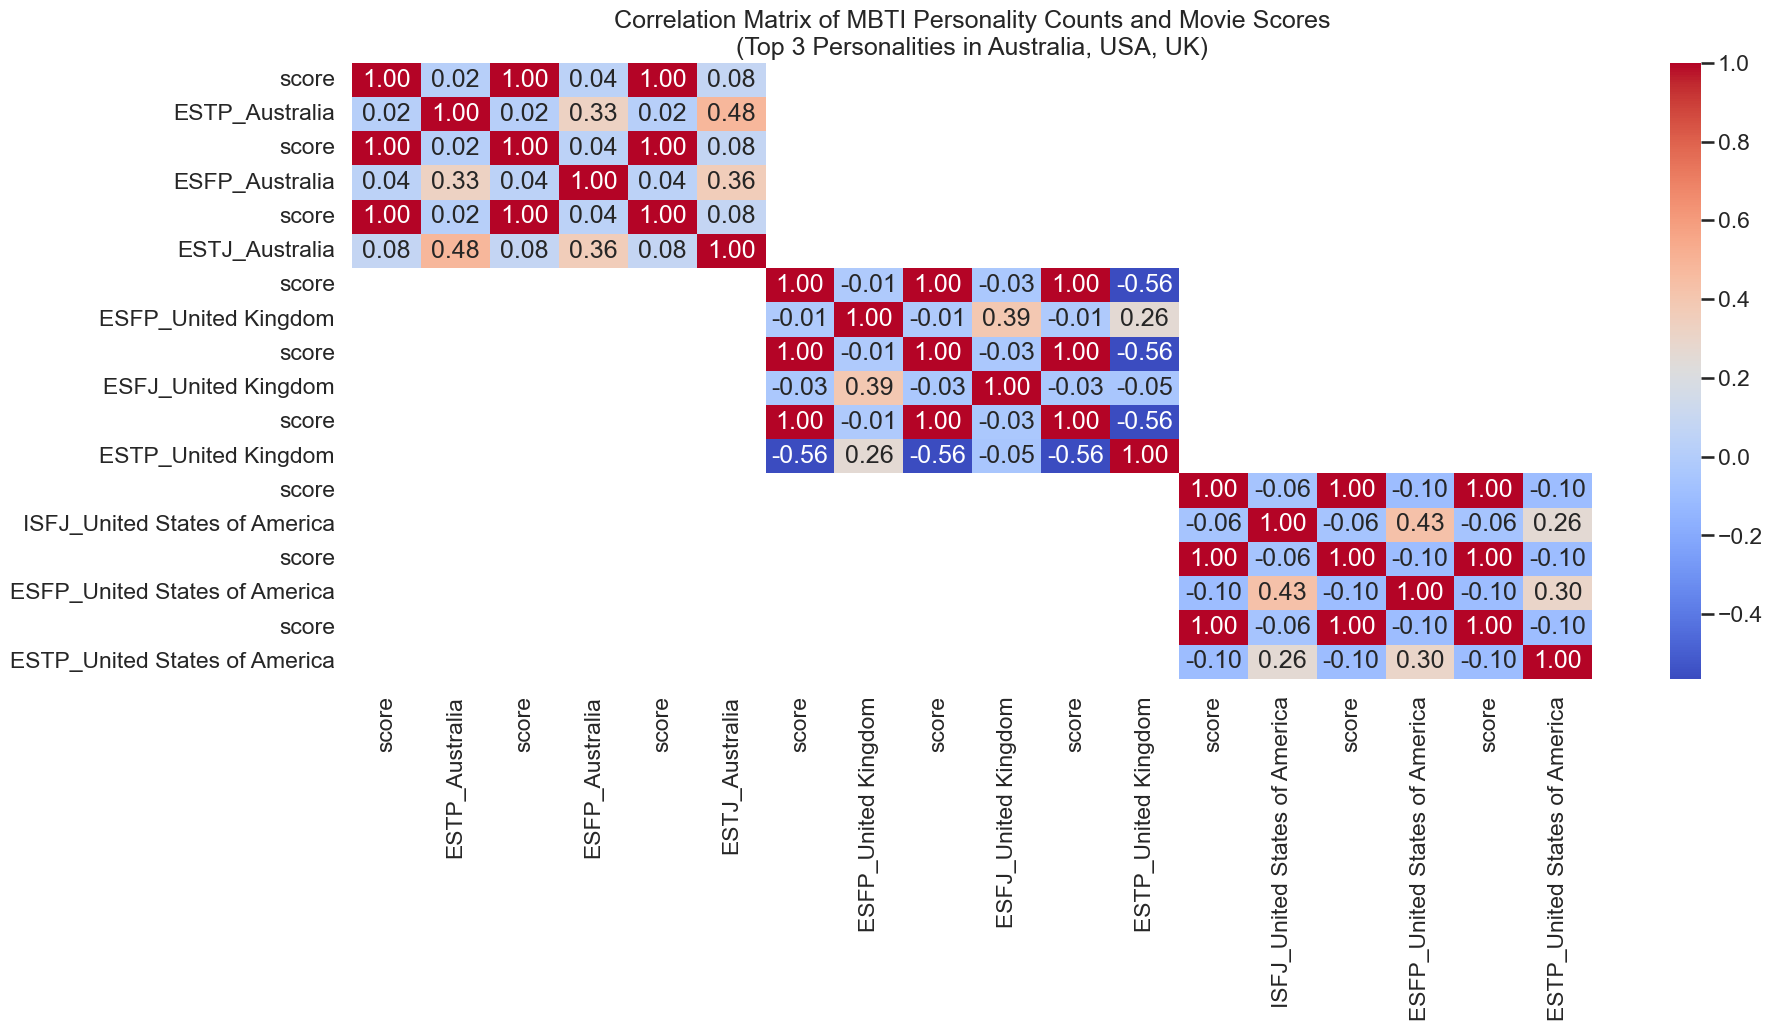

In [232]:
# Creating a new DataFrame for correlation analysis with movie scores
correlation_data_score = []

for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        country_data = filtered_df[filtered_df['country'] == country]
        correlation_data_score.append(country_data[['score', mbti]].rename(columns={mbti: f"{mbti}_{country}"}))

# Concatenating the data for correlation analysis
correlation_df_score = pd.concat(correlation_data_score, axis=1)

# Calculating the correlation matrix
correlation_matrix_score = correlation_df_score.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix_score, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MBTI Personality Counts and Movie Scores\n(Top 3 Personalities in Australia, USA, UK)')
plt.show()



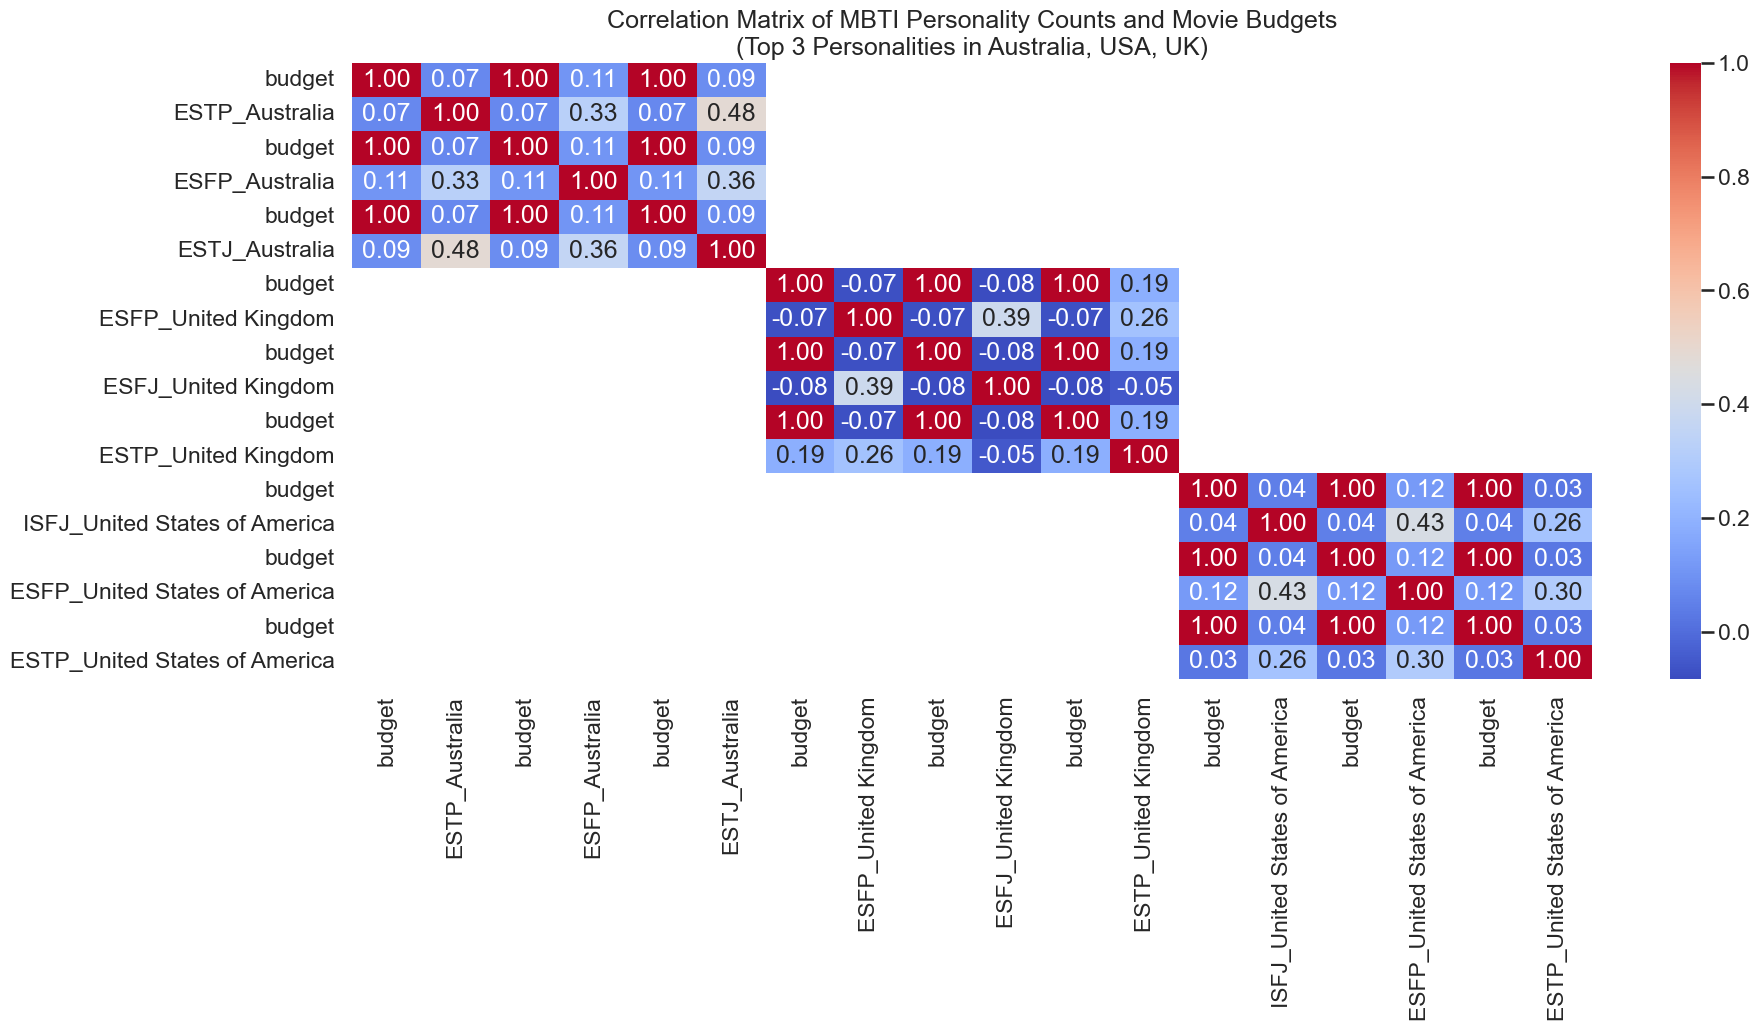

In [233]:
# Creating a new DataFrame for correlation analysis with movie scores
correlation_data_score = []

for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        country_data = filtered_df[filtered_df['country'] == country]
        correlation_data_score.append(country_data[['budget', mbti]].rename(columns={mbti: f"{mbti}_{country}"}))

# Concatenating the data for correlation analysis
correlation_df_score = pd.concat(correlation_data_score, axis=1)

# Calculating the correlation matrix
correlation_matrix_score = correlation_df_score.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(20, 8))
sns.set_style("white")
sns.heatmap(correlation_matrix_score, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MBTI Personality Counts and Movie Budgets\n(Top 3 Personalities in Australia, USA, UK)')
plt.show()

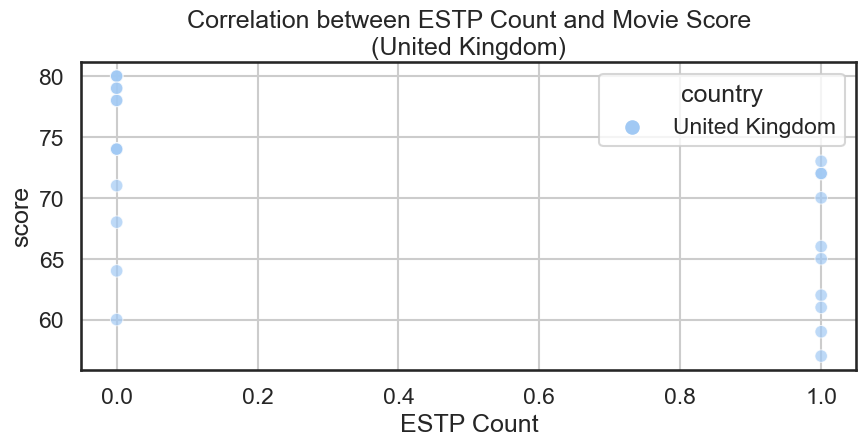

In [234]:
# plot the correlation between score and ESTP in Australia
plt.figure(figsize=(10, 4))
sns.scatterplot(data=filtered_df[filtered_df['country'] == 'United Kingdom'], x='ESTP', y='score', hue='country', alpha=0.7)
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom)')
plt.xlabel('ESTP Count')
plt.ylabel('score')
plt.grid(True)
plt.show()

In [235]:
# List the movie with the highest ESTP count in United Kingdom
filtered_df[filtered_df['country'] == 'United Kingdom'].sort_values(by=['ESTP', 'score'], ascending=False).head(10)

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,average_mbti
9087,Becoming Jane,2007-03-09,73.0,"Romance, Drama",16500000.0,39380831.0,United Kingdom,2007.0,Europe,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.3125
7567,Dangerous Liaisons,1989-03-10,72.0,"Drama, Romance",24200000.0,10447579.0,United Kingdom,1989.0,Europe,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500
7568,Dangerous Liaisons,1989-03-10,72.0,"Drama, Romance",14000000.0,34700000.0,United Kingdom,1989.0,Europe,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500
8130,Jane Eyre,2011-09-09,72.0,"Drama, Romance",26648000.0,34710627.0,United Kingdom,2011.0,Europe,1.0,...,1.0,1.0,3.0,0.0,0.0,1.0,0.0,2.0,0.0,1.2500
5684,The Duchess,2008-09-05,70.0,"Drama, History, Romance",27000000.0,45160110.0,United Kingdom,2008.0,Europe,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.2500
5541,Girl With A Pearl Earring,2004-01-16,66.0,"Drama, Romance",12000000.0,43153588.0,United Kingdom,2004.0,Europe,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5000
4282,Mowgli: Legend Of The Jungle,2018-12-07,65.0,"Adventure, Drama",175000000.0,20267371.6,United Kingdom,2018.0,Europe,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.3750
5942,Gnome Alone,2018-10-19,62.0,"Family, Adventure, Animation, Comedy, Fantasy",16740000.0,10800715.0,United Kingdom,2018.0,Europe,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.1875
6699,Mansfield Park,2007-03-18,61.0,"Drama, Tv Movie",62900000.0,414820827.8,United Kingdom,2007.0,Europe,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500
7095,Creep,2005-01-28,59.0,"Horror, Thriller, Mystery",139000000.0,405888913.2,United Kingdom,2005.0,Europe,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1250


In [236]:
filtered_df[filtered_df['country'] == 'United Kingdom'].sort_values(by=['ESTP', 'score'], ascending=True).head(10)

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,average_mbti
6707,Dorian Gray,2009-09-09,60.0,"Fantasy, Drama, Thriller",10500000.0,4706919.0,United Kingdom,2009.0,Europe,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1875
10134,Lady Chatterley'S Lover,2015-09-06,64.0,"Romance, Drama",102000000.0,254278668.2,United Kingdom,2015.0,Europe,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0625
888,Lady Chatterley'S Lover,2022-10-14,68.0,"Drama, Romance",68800000.0,226866064.6,United Kingdom,2022.0,Europe,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0625
7696,Straw Dogs,1972-01-30,71.0,"Crime, Drama, Thriller",25000000.0,11253821.0,United Kingdom,1972.0,Europe,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0625
2754,The Fly,1987-02-13,74.0,"Horror, Science Fiction",15000000.0,60629159.0,United Kingdom,1987.0,Europe,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.1250
3519,Lolita,1962-09-11,74.0,"Drama, Comedy, Romance",55000000.0,1147784.0,United Kingdom,1962.0,Europe,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5000
3520,Lolita,1962-09-11,74.0,"Drama, Comedy, Romance",2000000.0,9250000.0,United Kingdom,1962.0,Europe,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5000
6463,The Wicker Man,1973-12-01,74.0,Horror,810000.0,61653477.2,United Kingdom,1973.0,Europe,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2500
7213,A Christmas Carol,1984-10-09,74.0,"Drama, Fantasy, Tv Movie, Family",104200000.0,379238515.8,United Kingdom,1984.0,Europe,2.0,...,0.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.6250
7736,Dogville,2004-02-13,78.0,"Crime, Drama, Thriller",10000000.0,16680836.0,United Kingdom,2004.0,Europe,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1875


### ESTP and movie score, focus on UK

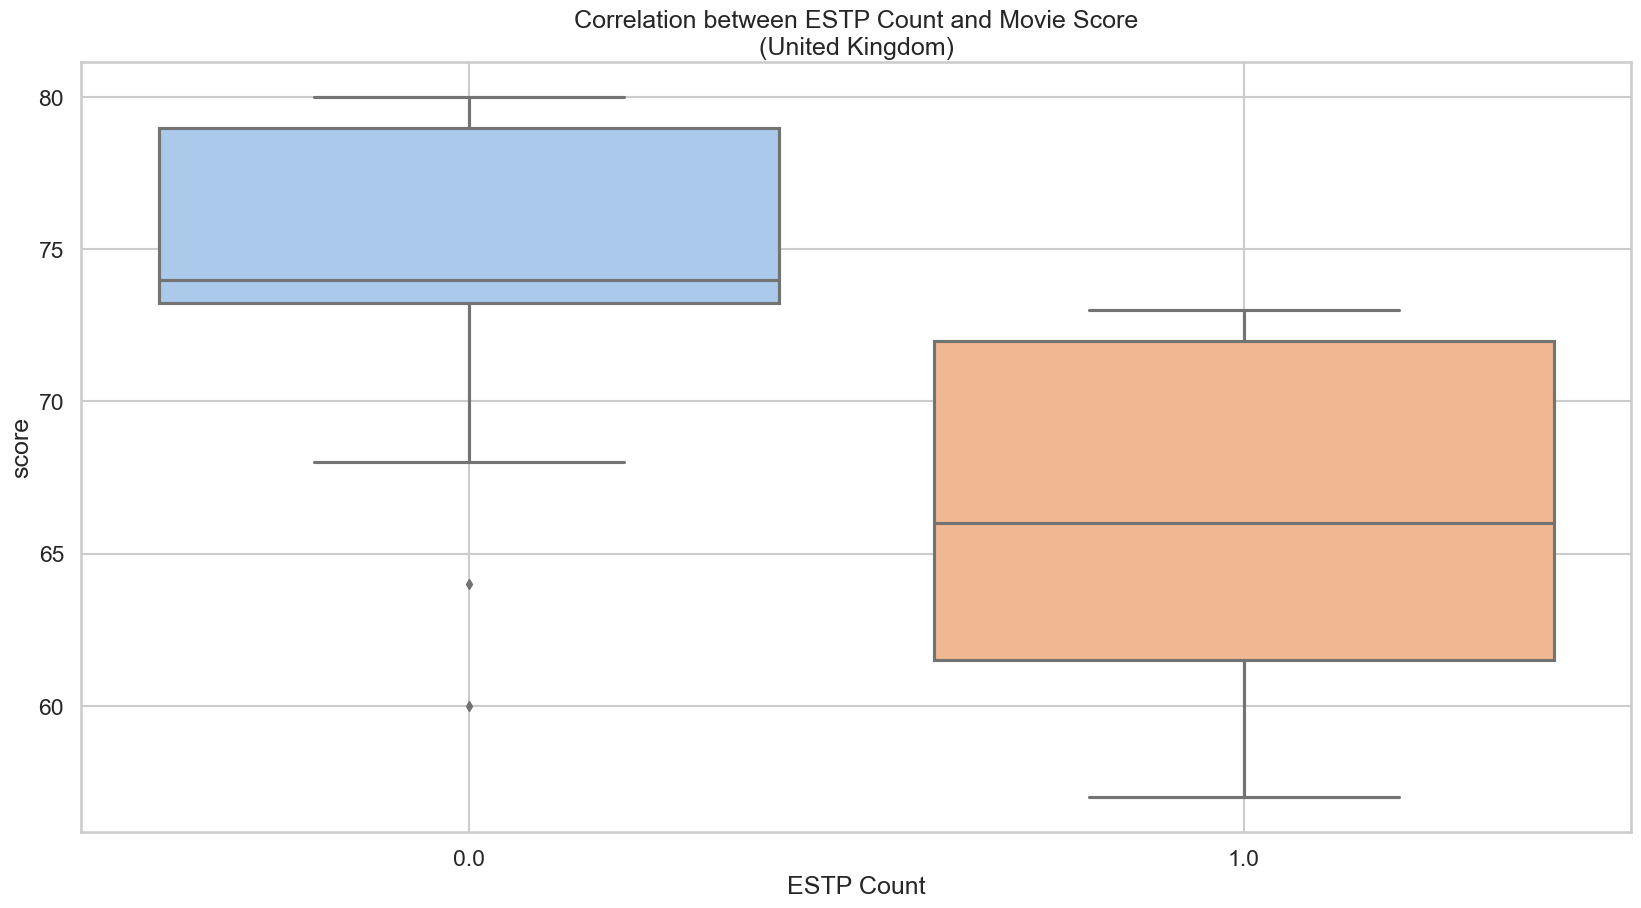

In [246]:
# Plot the boxplot of score in UK with and without ESTP
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df[filtered_df['country'] == 'United Kingdom'], x='ESTP', y='score')
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom)')
plt.xlabel('ESTP Count')
plt.ylabel('score')
plt.grid(True)
plt.show()

In [238]:
# Filter out the movie genres that contain 'Romance' and do not have NaN values
filtered_df_romance = filtered_df[filtered_df['genre'].str.contains('Romance') & filtered_df['genre'].notna()]
filtered_df_romance.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,average_mbti
132,Life In A Year,2020-11-27,83.0,"Drama, Romance",90000000.0,6.278511e+08,United States of America,2020.0,North America,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.3125
216,The Little Mermaid,2023-05-26,0.0,"Adventure, Family, Fantasy, Romance",205000000.0,1.783599e+08,United States of America,2023.0,North America,0.0,...,2.0,0.0,2.0,1.0,0.0,3.0,2.0,2.0,3.0,1.4375
247,Fifty Shades Of Grey,2015-02-12,59.0,"Drama, Romance, Thriller",40000000.0,5.707950e+08,Australia,2015.0,Oceania,0.0,...,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.6875
309,Titanic,1997-12-18,79.0,"Drama, Romance",200000000.0,2.222986e+09,Australia,1997.0,Oceania,0.0,...,2.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.8125
330,Me Before You,2016-06-16,79.0,"Drama, Romance",20000000.0,2.080649e+08,Australia,2016.0,Oceania,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1875


### Focus on Romance Genre in UK

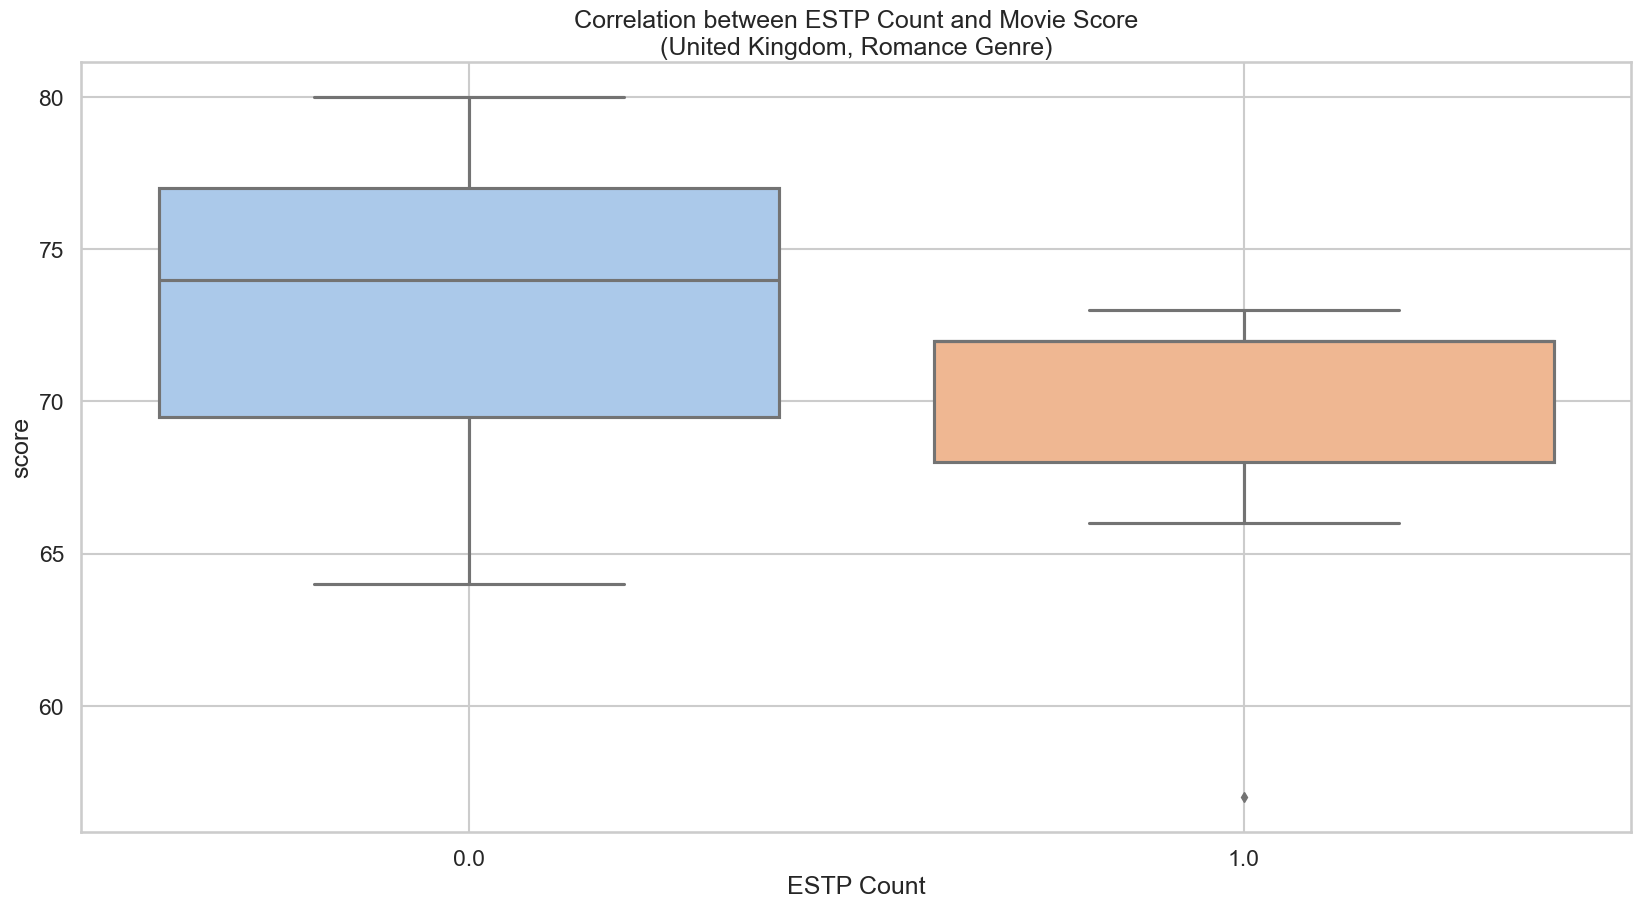

In [247]:
# Draw the boxplot of score in UK with and without ESTP
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df_romance[filtered_df_romance['country'] == 'United Kingdom'], x='ESTP', y='score')
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom, Romance Genre)')
plt.xlabel('ESTP Count')
plt.ylabel('score')
plt.grid(True)
plt.show()


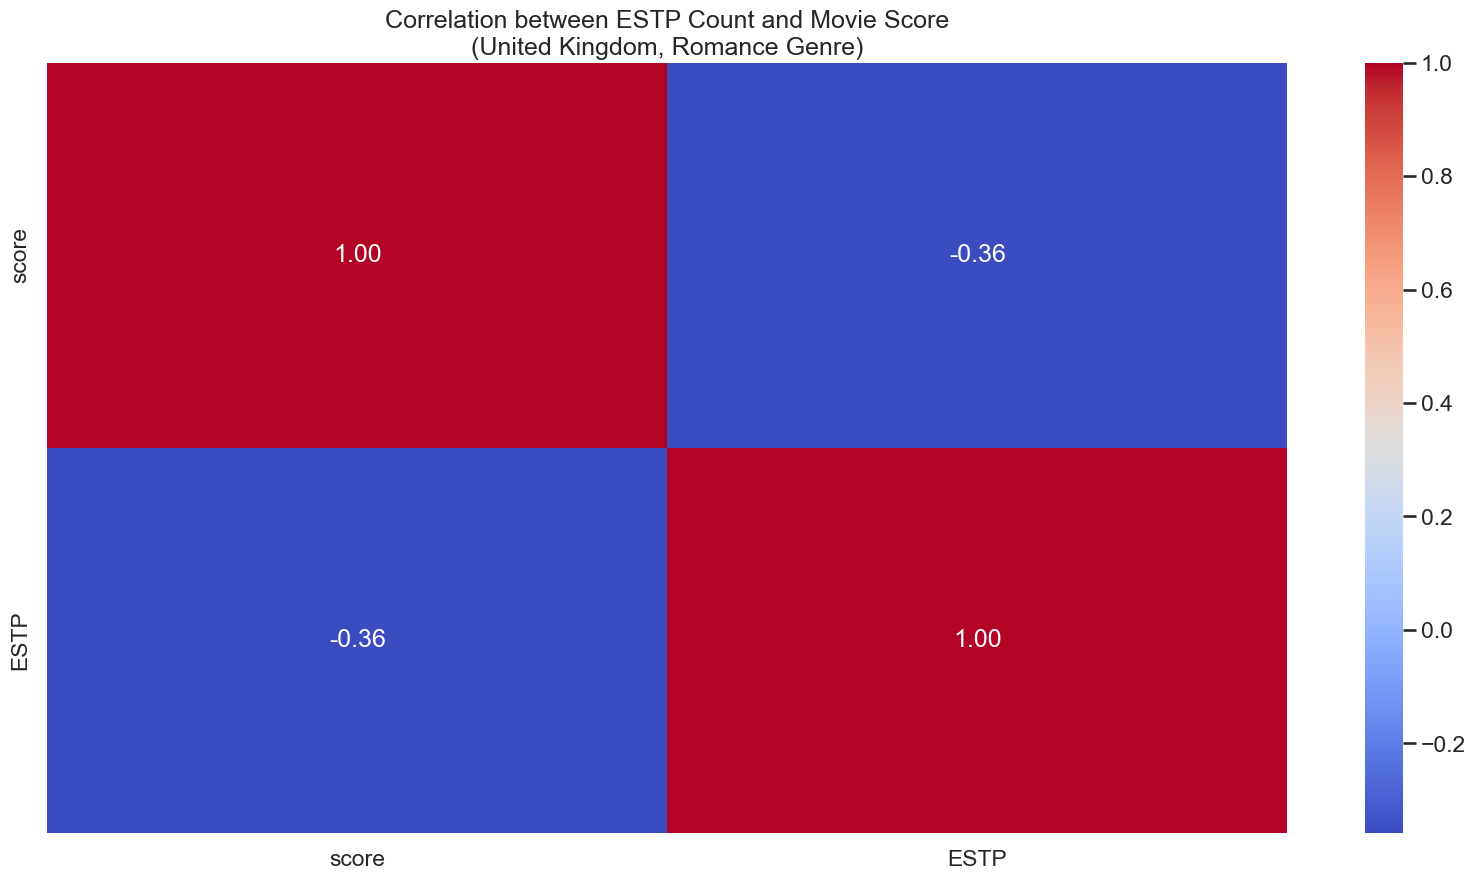

In [251]:
# Draw the correlation matrix of score and ESTP in UK
plt.figure(figsize=(20, 10))
sns.heatmap(filtered_df_romance[filtered_df_romance['country'] == 'United Kingdom'][['score', 'ESTP']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom, Romance Genre)')

plt.show()

### Zoom out to top3 landscape

Text(0.5, 1.0, 'Correlation between ESTP Count and Movie Score (Romance Movies)')

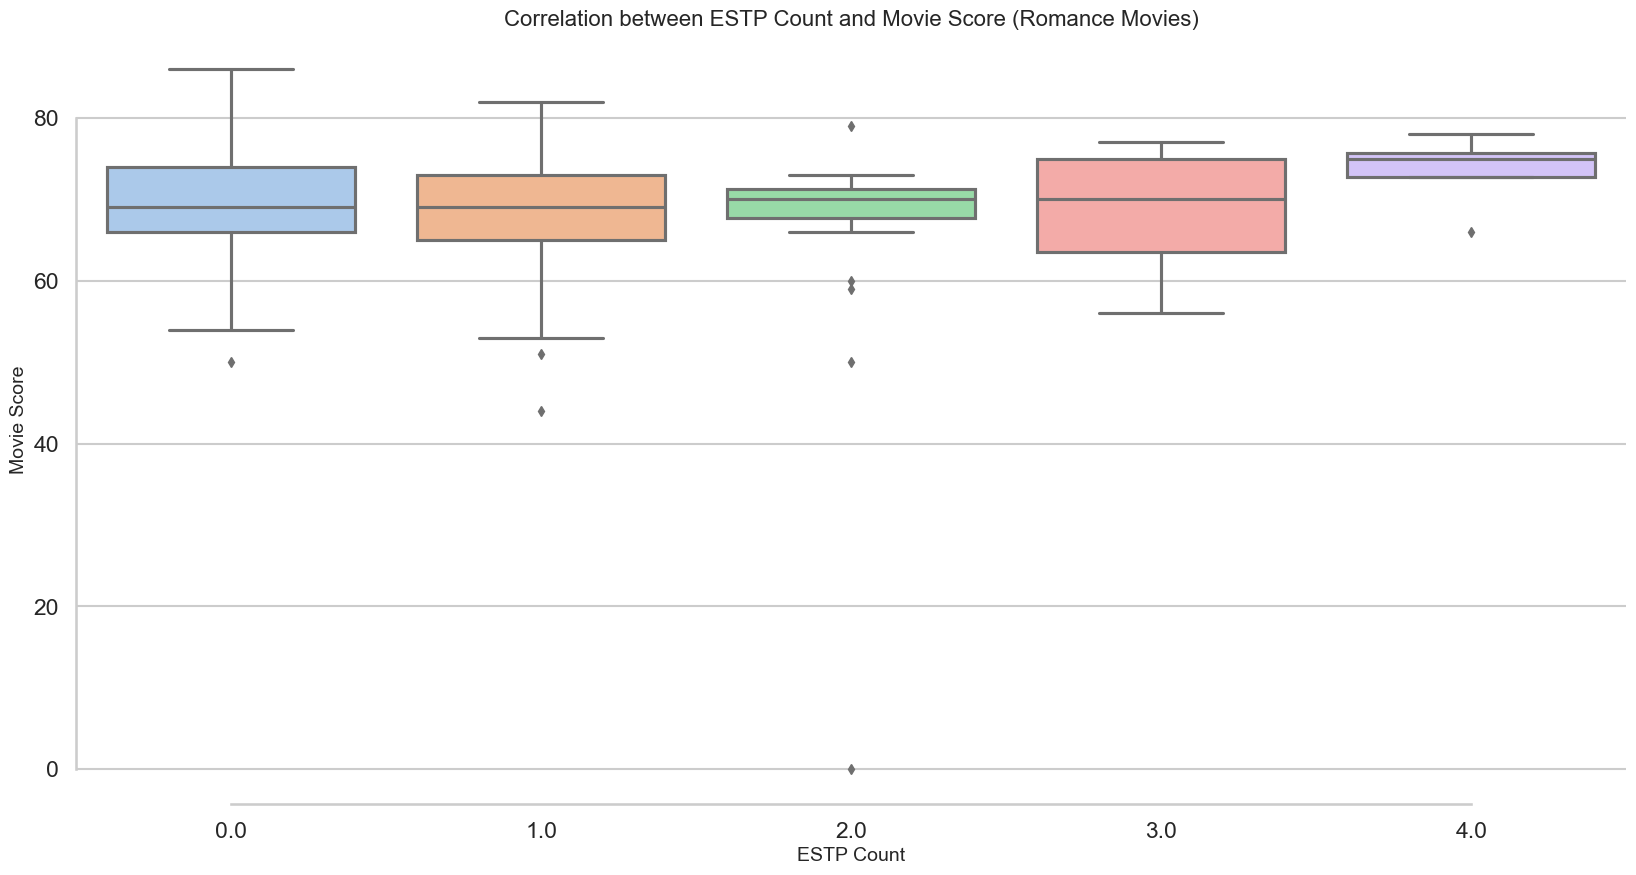

In [248]:
# # Plot the boxplot of score over the world with and without ESTP
# plt.figure(figsize=(10, 4))
# sns.boxplot(data=filtered_df_romance, x='ESTP', y='score')
# plt.title('Correlation between ESTP Count and Movie Score\n(Romance Movies)')
# plt.xlabel('ESTP Count')
# plt.ylabel('score')
# plt.grid(True)
# plt.show()


# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Set the context to "talk" for larger fonts and lines
sns.set_context('talk')

# Choose a nice color palette
sns.set_palette('pastel')

# Create the boxplot with Seaborn
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='ESTP', y='score', data=filtered_df_romance)

# Despine the plot
sns.despine(trim=True)

# Set the labels and title
ax.set_xlabel('ESTP Count', fontsize=14)
ax.set_ylabel('Movie Score', fontsize=14)
ax.set_title('Correlation between ESTP Count and Movie Score (Romance Movies)', fontsize=16)


In [242]:
# Calculate the length of the movie in Europe but not in UK
filtered_df[filtered_df['continent'] == 'Europe']['country'].nunique()

1

In [243]:
# Filter out the movie genres that contain 'Thriller' and do not have NaN values
filtered_df_dramma = filtered_df[filtered_df['genre'].str.contains('Drama') & filtered_df['genre'].notna()]
filtered_df_dramma.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,average_mbti
58,A Bronx Tale,1994-05-20,78.0,"Drama, Crime",10000000.0,17287898.0,Australia,1994.0,Oceania,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.375
109,The Ten Commandments,1958-12-12,78.0,"Drama, History",13500000.0,85433929.0,Australia,1958.0,Oceania,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.500
110,The Ten Commandments,1958-12-12,78.0,"Drama, History",10000000.0,1051907.0,Australia,1958.0,Oceania,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.500
115,Creed,2015-11-26,74.0,Drama,37000000.0,173567581.0,Australia,2015.0,Oceania,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.125
127,Hacksaw Ridge,2016-10-07,82.0,"Drama, History, War",40000000.0,169023926.0,Australia,2016.0,Oceania,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.375


### Focus on Drama

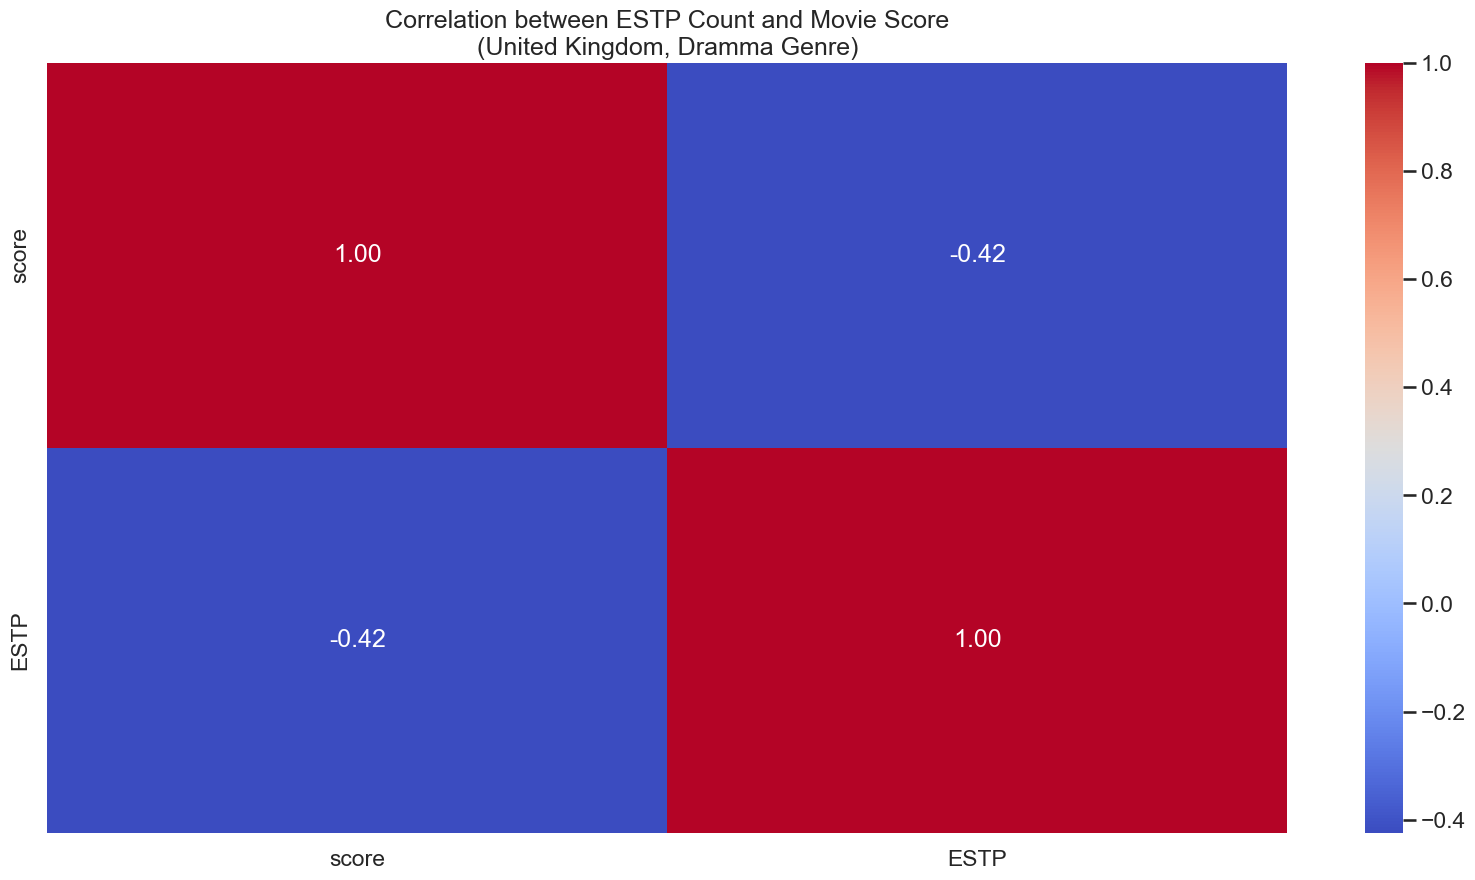

In [250]:
# Draw the correlation matrix of score and ESTP in UK
plt.figure(figsize=(20, 10))
sns.heatmap(filtered_df_dramma[filtered_df_dramma['country'] == 'United Kingdom'][['score', 'ESTP']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom, Dramma Genre)')
plt.show()

### Zoom out to global landscape

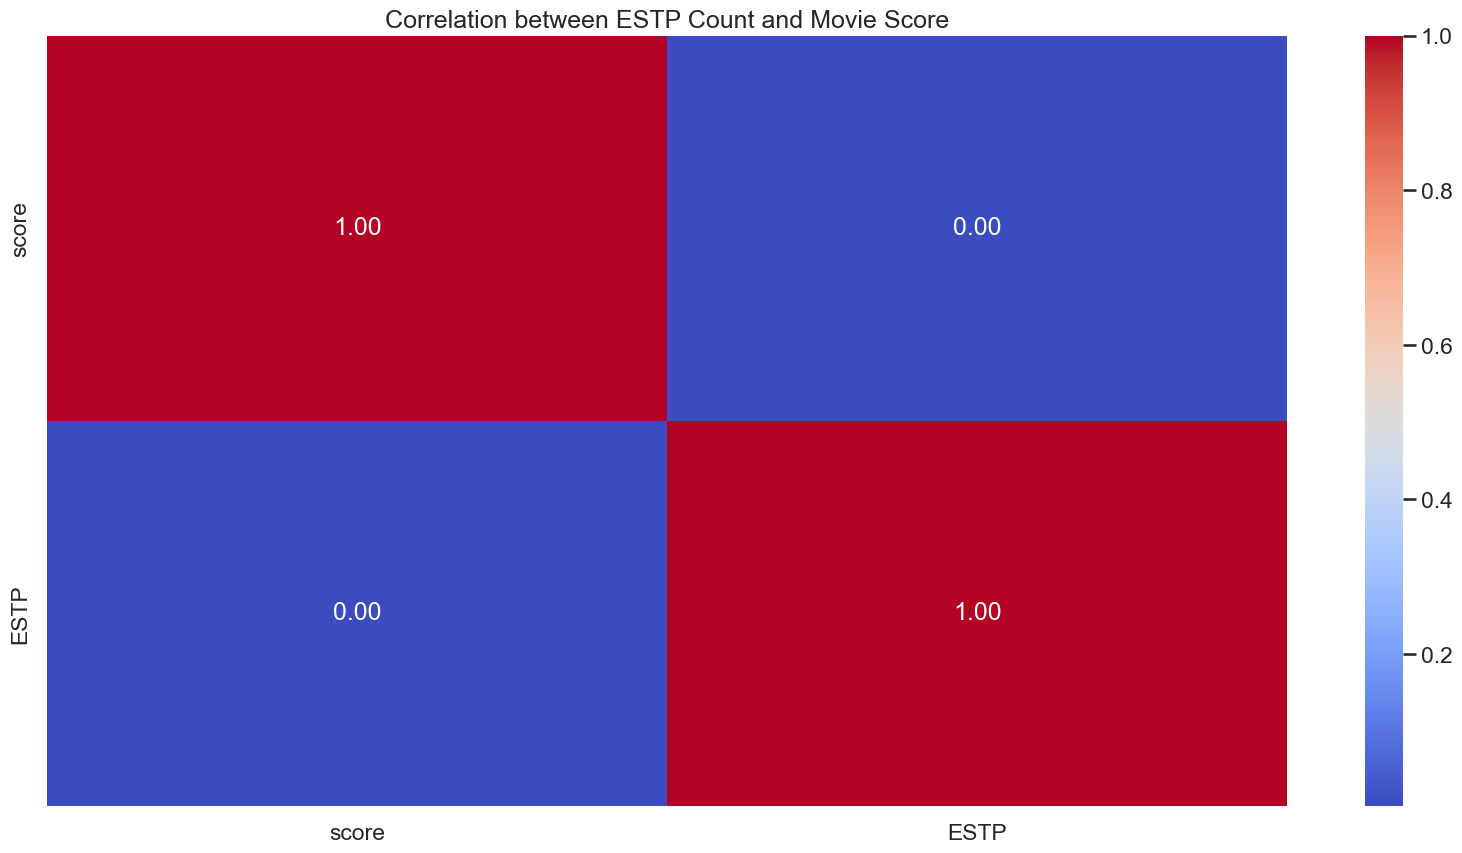

In [249]:
# Plot the correlation matrix of score and ESTP over the world
plt.figure(figsize=(20, 10))
sns.heatmap(df_imdb_mbti[['score', 'ESTP']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between ESTP Count and Movie Score')
plt.show()